### This example notebook demonstrates the usage of `AgrowthfR_re.py` and `Fisher_MG_Final.py`. 

#### `AgrowthfR_re.py` is a module containing classes that solve for the linear growth of the large-scale structure from the growth differential equations, under the $\Lambda$CDM, Hu-Sawicki f(R), and nDGP scenarios. `Fisher_MG_Final.py` is another module performing Fisher analyses under these scenarios.

In [1]:
#Import the relevant modules and libraries
import numpy as np
import Fisher_MG_final
import AgrowthfR_re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.rcParams['font.family'] = 'DejaVu Sans'
rc('text', usetex=True)
plt.rcParams.update({'font.size': 19}) 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #Makes the plot clearer and easier to see
HS = AgrowthfR_re.HuSawicki()
DGP = AgrowthfR_re.DGP()
LCDM = AgrowthfR_re.LCDM()
Cm = AgrowthfR_re.Cosmosground()  #Cosmosground() is the parent class of all MG models, 
                                  #storing the universal cosmology parameters and auxilary functions 
                                  #such as σ8

#### 1. Calculate the growth function solution ($D(z)$) directly

In [2]:
#f(R), f_{R0} = 1e-6
#We use z = np.linspace(0.05, 2.95, 30) and k = np.logspace(-4, 1, 513) for our research, 
#but the module itself has flexibility. 
#This cell has a bit longer k range, and will take several seconds to run.
HS.setpars(np.array([-6, 1]))
z = np.linspace(0, 10, 150)
k = np.logspace(-4, 10, 1000)
HS.solvegrowth(z, k)

array([[0.78780812, 0.7603088 , 0.73363531, ..., 0.09200378, 0.0914395 ,
        0.09088211],
       [0.78780812, 0.7603088 , 0.73363531, ..., 0.09200378, 0.0914395 ,
        0.09088211],
       [0.78780812, 0.7603088 , 0.73363531, ..., 0.09200378, 0.0914395 ,
        0.09088211],
       ...,
       [2.24390963, 2.15099435, 2.06151427, ..., 0.17547641, 0.17420059,
        0.17294175],
       [2.24390969, 2.15099441, 2.06151433, ..., 0.17547642, 0.17420059,
        0.17294175],
       [2.24390975, 2.15099446, 2.06151438, ..., 0.17547642, 0.1742006 ,
        0.17294175]])

In [3]:
#f(R), near GR limit (f_{R0} = 0)
HS.setpars(np.array([0, 1]))
z = np.linspace(5, 10, 150)
k = np.logspace(-2, 1, 137)
HS.solvegrowth(z, k)

array([[0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211],
       [0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211],
       [0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211],
       ...,
       [0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211],
       [0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211],
       [0.16636301, 0.16544273, 0.16453253, ..., 0.0914395 , 0.09115995,
        0.09088211]])

In [4]:
#nDGP, n=1
DGP.setpars(1)
z = np.linspace(0.15, 1.85, 18) #This redshift is to align with the galaxy clustering results for checks
k = np.logspace(-4, 1, 513)
nDGPn1 = DGP.solvegrowth(z)
np.savetxt('Growthfactor_DGPn1', nDGPn1)
print(nDGPn1)

[0.77444871 0.7319599  0.69223377 0.65530864 0.62112475 0.58955849
 0.56044883 0.53361657 0.5088776  0.48605146 0.46496657 0.44546309
 0.42739414 0.41062604 0.39503793 0.38052096 0.3669774  0.35431963]


In [5]:
#nDGP, n=5
DGP.setpars(5)
z = np.linspace(0.15, 1.85, 18) #This redshift is to align with the galaxy clustering results for checks
k = np.logspace(-4, 1, 513)
nDGPn5 = DGP.solvegrowth(z)
np.savetxt('Growthfactor_DGPn5', nDGPn5)
print(nDGPn5)

[0.73859667 0.69973799 0.66328166 0.62928176 0.59770245 0.5684482
 0.54138732 0.51636941 0.49323745 0.47183583 0.45201532 0.4336359
 0.41656816 0.40069367 0.38590487 0.37210447 0.35920477 0.34712685]


#### 2. Get the $\sigma_8/\sigma_{8(\Lambda CDM)}$ ratio, $\sigma_{8(\Lambda CDM)}$ calculated from the $\Lambda$CDM solution of the linear growth equation. We normalize our results at $z=10$.

In [6]:
#f(R), f_{R0} = 1e-6
z = np.linspace(0, 5, 20)
k = np.logspace(-4, 1, 600)
HS.setpars(np.array([-6, 1]))
hs6_s8 = Cm.sigma8_ratio(HS, z, k)
hs6_s8

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


array([1.01581   , 1.01135909, 1.00766303, 1.00493455, 1.00308109,
       1.00189174, 1.00115568, 1.00070891, 1.00043946, 1.00027644,
       1.00017686, 1.00011519, 1.00007639, 1.00005156, 1.00003539,
       1.00002468, 1.00001747, 1.00001254, 1.00000911, 1.0000067 ])

In [7]:
#Test GR limit (f_{R0} = 0)
z = np.linspace(0, 5, 20)
k = np.logspace(-4, 1, 600)
HS.setpars(np.array([0, 1]))
hs0_s8 = Cm.sigma8_ratio(HS, z, k)
hs0_s8

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [8]:
#Using the ΛCDM subclass
z = np.linspace(0, 5, 20)
k = np.logspace(-4, 1, 600)
lcdm_s8 = Cm.sigma8_ratio(LCDM, z, k)
lcdm_s8

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

#### 3. Additionals to $\sigma_8$: Testing with Linder's fitting function specified in arXiv:astro-ph/0507263v2.

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)


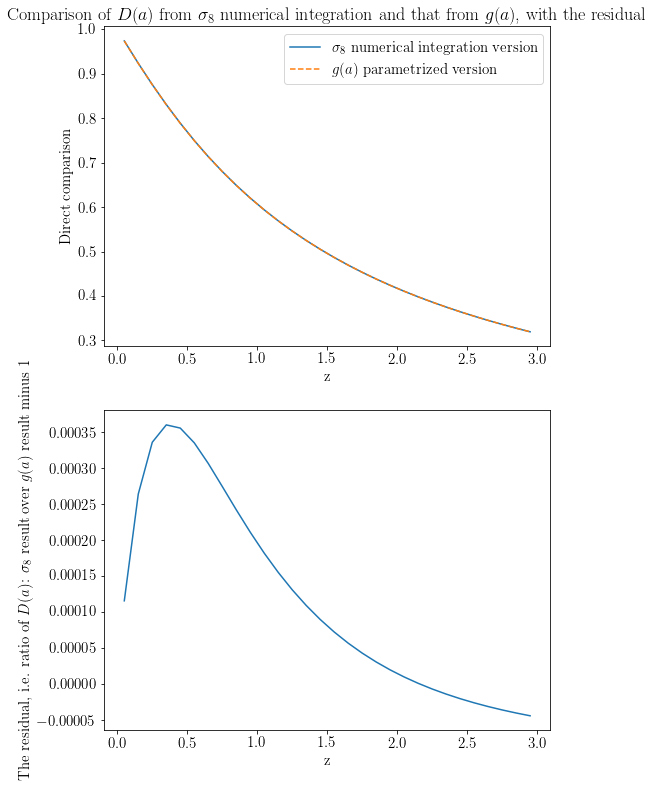

In [9]:
#For the ΛCDM model, the fitting function features a phenomenological parameter γ = 0.55.
#Here we compare the D(a) in my calculation and that predicted by the fitting function.
plt.rcParams.update({'font.size': 15})
z = np.linspace(0.05, 2.95, 30)
Cm.Linder_compare(LCDM, 0.55, z)

#### 4. Plotting the overview of $f_R$ model with $n=1$, changing $f_{R0}$

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


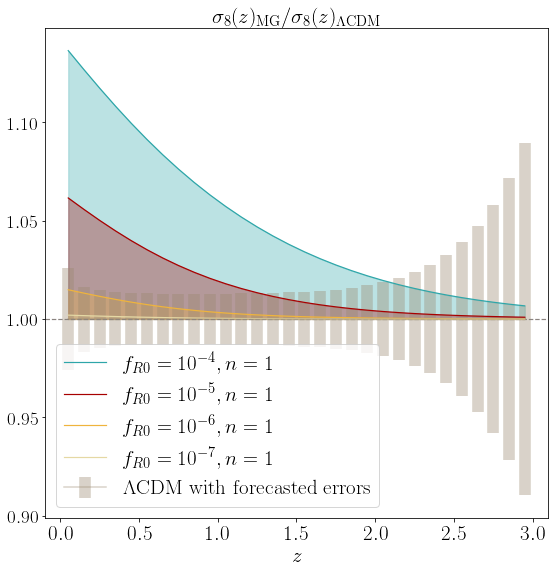

In [10]:
plt.rcParams.update({'font.size': 19})
z = np.linspace(0.05, 2.95, 30)
k = np.logspace(-4, 1, 513)
HS.setpars((-4, 1))
rF4 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-5, 1))
rF5 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 1))
rF6 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 1))
rF7 = Cm.sigma8_ratio(HS, z, k)
labels = [r'$f_{R0}=10^{-4}, n=1$', r'$f_{R0}=10^{-5}, n=1$', r'$f_{R0}=10^{-6}, n=1$', r'$f_{R0}=10^{-7}, n=1$']
Fisher_MG_final.ratio_s8_mg_err(z, (rF4, rF5, rF6, rF7), labels)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


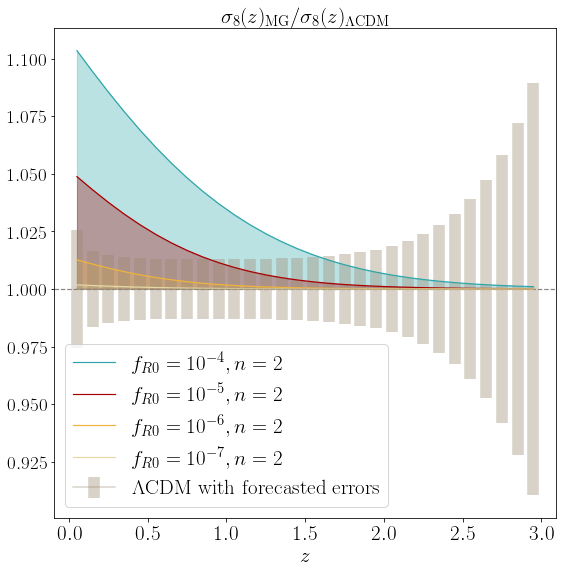

In [11]:
#What happens if n=2? - Yeah, the ratio going to 1 more rapidly, 
#and the deviations are further at low redshifts compared to n=1.
plt.rcParams.update({'font.size': 19})
z = np.linspace(0.05, 2.95, 30)
k = np.logspace(-4, 1, 513)
HS.setpars((-4, 2))
rF4 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-5, 2))
rF5 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 2))
rF6 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 2))
rF7 = Cm.sigma8_ratio(HS, z, k)
labels = [r'$f_{R0}=10^{-4}, n=2$', r'$f_{R0}=10^{-5}, n=2$', r'$f_{R0}=10^{-6}, n=2$', r'$f_{R0}=10^{-7}, n=2$']
Fisher_MG_final.ratio_s8_mg_err(z, (rF4, rF5, rF6, rF7), labels)

#### 4. Plotting the overview of $f_R$ model fixed $f_{R0}$, changing $n$

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


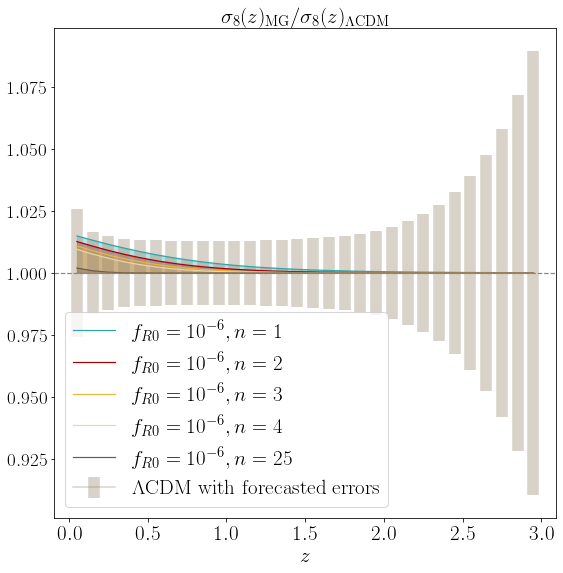

In [12]:
z = np.linspace(0.05, 2.95, 30)
k = np.logspace(-4, 1, 513)
HS.setpars((-6, 1))
Fn1 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 2))
Fn2 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 3))
Fn3 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 4))
Fn4 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-6, 25)) #Introducing a very high n to see what it does
Fn25 = Cm.sigma8_ratio(HS, z, k)
labelsn = [r'$f_{R0}=10^{-6}, n=1$', r'$f_{R0}=10^{-6}, n=2$', r'$f_{R0}=10^{-6}, n=3$', r'$f_{R0}=10^{-6}, n=4$', r'$f_{R0}=10^{-6}, n=25$']
Fisher_MG_final.ratio_s8_mg_err(z, (Fn1, Fn2, Fn3, Fn4, Fn25), labelsn)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


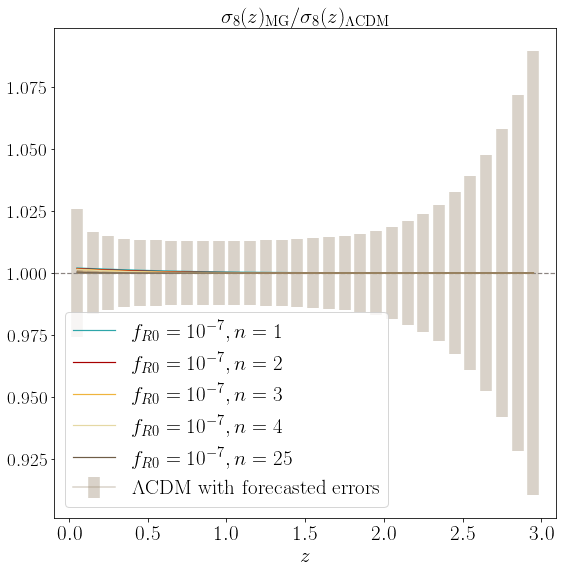

In [13]:
HS.setpars((-7, 1))
Fn1 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 2))
Fn2 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 3))
Fn3 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 4))
Fn4 = Cm.sigma8_ratio(HS, z, k)
HS.setpars((-7, 25))
Fn25 = Cm.sigma8_ratio(HS, z, k)
labelsn = [r'$f_{R0}=10^{-7}, n=1$', r'$f_{R0}=10^{-7}, n=2$', r'$f_{R0}=10^{-7}, n=3$', r'$f_{R0}=10^{-7}, n=4$', r'$f_{R0}=10^{-7}, n=25$']
Fisher_MG_final.ratio_s8_mg_err(z, (Fn1, Fn2, Fn3, Fn4, Fn25), labelsn, save = True)

It can be seen here that $n$ barely does anything to the change when $f_{R0}$ gets very small.

#### 5. Plotting the overview of $nDGP$ model with changing $r_c$

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


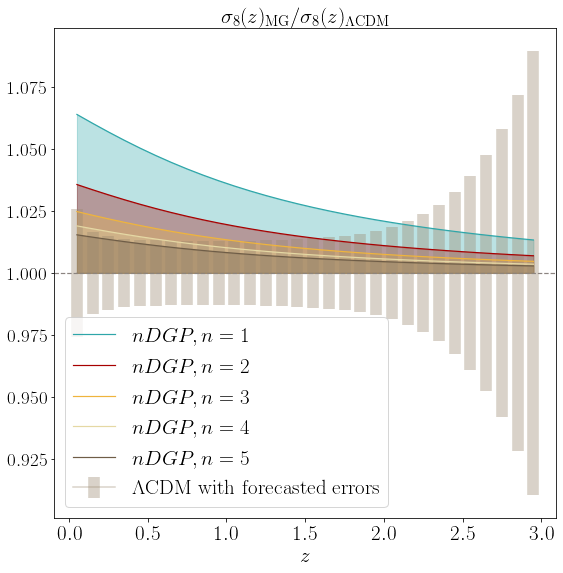

In [14]:
DGP.setpars(1)
FD1 = Cm.sigma8_ratio(DGP, z, k)
DGP.setpars(2)
FD2 = Cm.sigma8_ratio(DGP, z, k)
DGP.setpars(3)
FD3 = Cm.sigma8_ratio(DGP, z, k)
DGP.setpars(4)
FD4 = Cm.sigma8_ratio(DGP, z, k)
DGP.setpars(5)
FD5 = Cm.sigma8_ratio(DGP, z, k)
labelsnD = [r'$nDGP, n=1$', r'$nDGP, n=2$', r'$nDGP, n=3$', r'$nDGP, n=4$', r'$nDGP, n=5$']
Fisher_MG_final.ratio_s8_mg_err(z, (FD1, FD2, FD3, FD4, FD5), labelsnD)

#### 6. Perform Fisher analyses of $f_R$ model with $n=1$, $f_{R0}=10^{-5}, 10^{-6},  10^{-7}, 0$ respectively.

In [15]:
z = np.linspace(0.05, 2.95, 30)
k = np.logspace(-4, 1, 513)

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


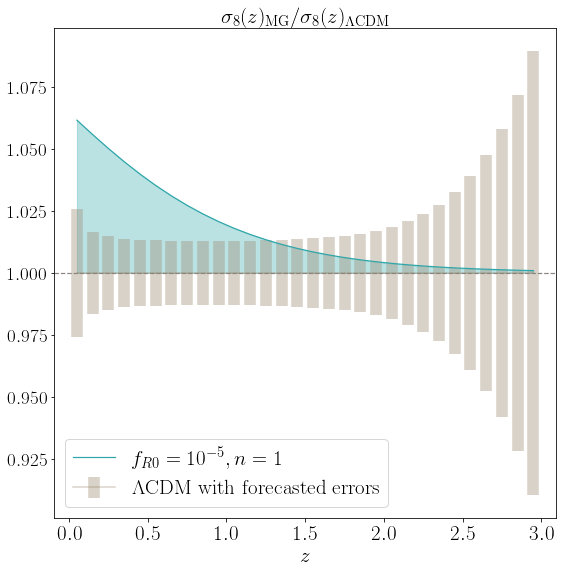

Testing partial derivative over log10(f_R0)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial derivative over n
Testing partia

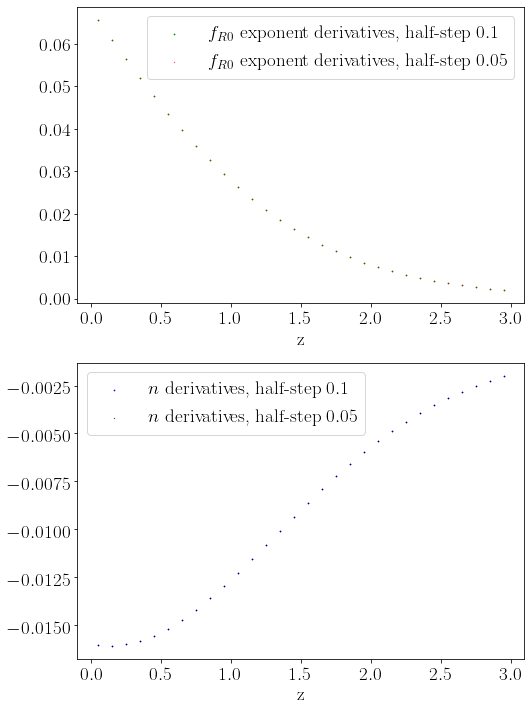

We are now looking at the redshifts:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]
The chosen derivative matrix is:
[[ 0.06556222 -0.01602545]
 [ 0.0608951  -0.01607094]
 [ 0.0563321  -0.01600652]
 [ 0.05190606 -0.0158344 ]
 [ 0.04764214 -0.01555975]
 [ 0.04355954 -0.01518998]
 [ 0.03967287 -0.0147342 ]
 [ 0.03599305 -0.01420276]
 [ 0.03252793 -0.01360686]
 [ 0.02928268 -0.01295824]
 [ 0.02625999 -0.01226884]
 [ 0.0234602  -0.01155056]
 [ 0.02088142 -0.01081493]
 [ 0.01851961 -0.01007287]
 [ 0.01636871 -0.00933449]
 [ 0.01442086 -0.00860884]
 [ 0.01266657 -0.00790378]
 [ 0.01109505 -0.0072259 ]
 [ 0.00969448 -0.00658045]
 [ 0.00845234 -0.00597136]
 [ 0.00735571 -0.00540127]
 [ 0.0063916  -0.0048717 ]
 [ 0.00554723 -0.00438311]
 [ 0.00481021 -0.0039351 ]
 [ 0.00416879 -0.00352655]
 [ 0.00361197 -0.0031558 ]
 [ 0.00312957 -0.00282076]
 [ 0.00271233 -0.00251912]
 [ 0.00235189 -0.002

0

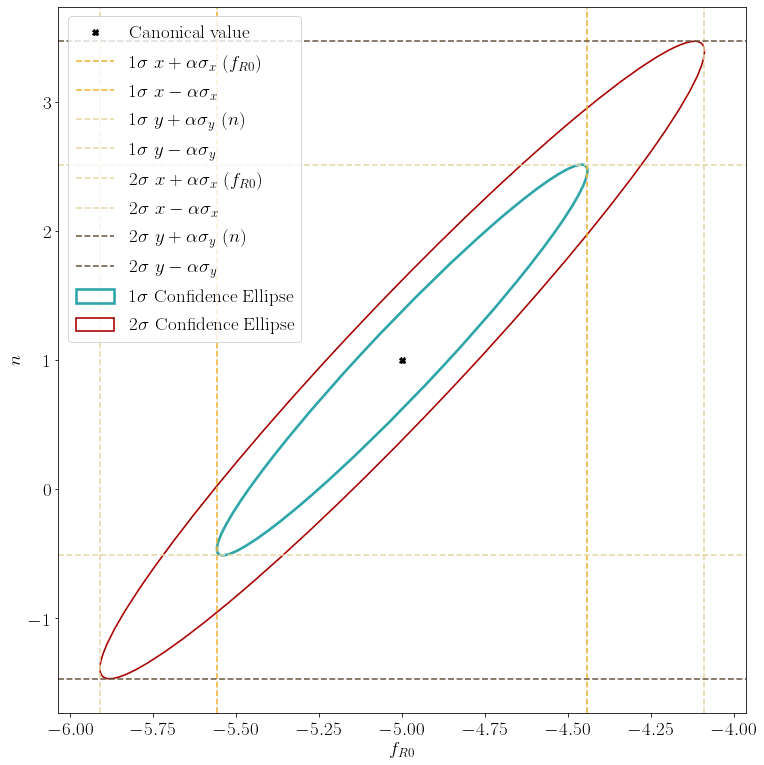

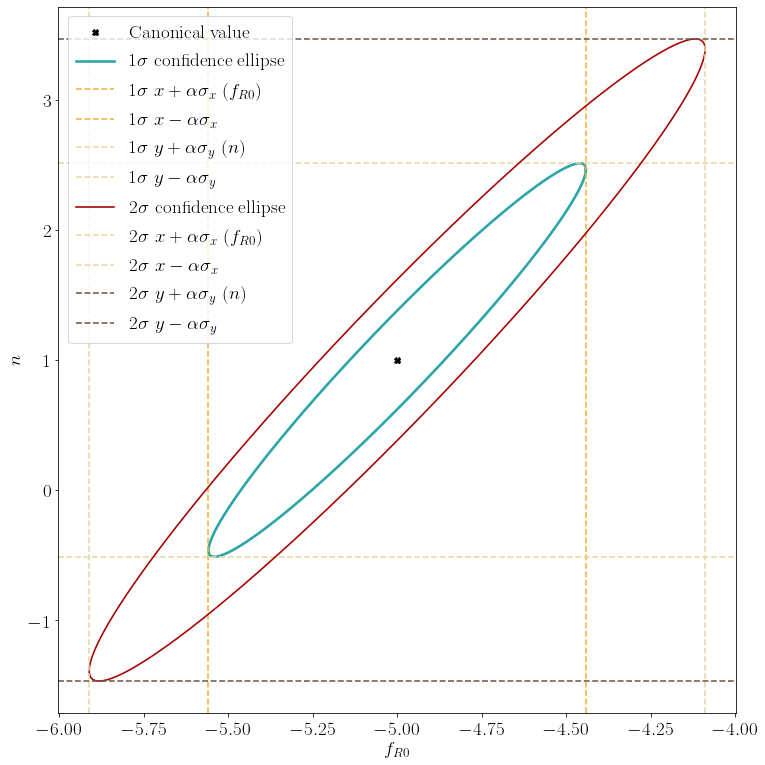

In [16]:
#f_{R0} = -5, normalized at z = 10. Five-point stencil added.
var = (z, k)
labels = r'$f_{R0} = 10^{-5}, n=1$'
pars = [-5, 1]
HS.set_axeslabels([r'$f_{R0}$', r'$n$'])
HS.set_printables(['log10(f_R0)', 'n'])
Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels, save = True)
import os
os.system('afplay /System/Library/Sounds/Submarine.aiff')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


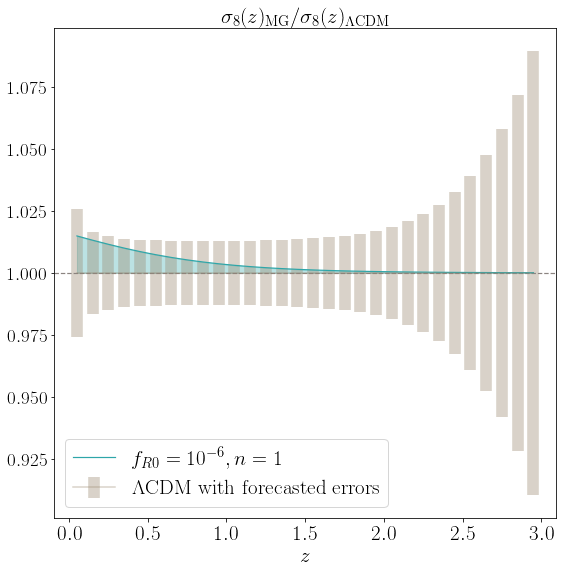

Testing partial derivative over log10(f_R0)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial derivative over n
Testing partia

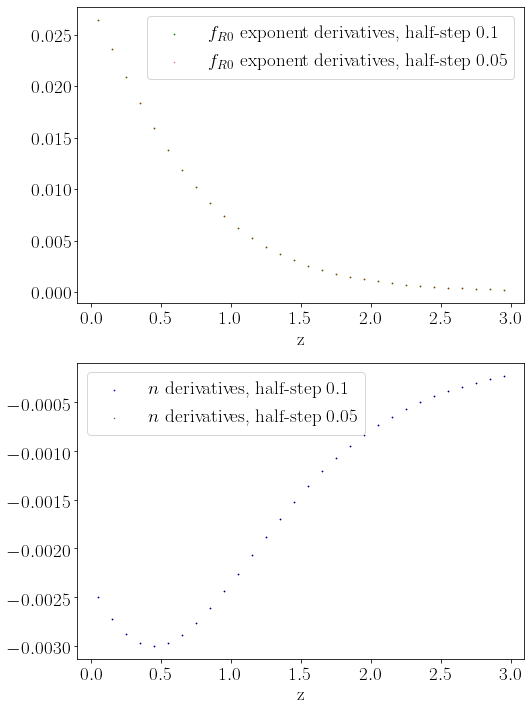

We are now looking at the redshifts:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]
The chosen derivative matrix is:
[[ 0.0263819  -0.00250414]
 [ 0.02355679 -0.00272783]
 [ 0.02085511 -0.00288495]
 [ 0.01831779 -0.00297466]
 [ 0.01597229 -0.00300028]
 [ 0.01383426 -0.00296826]
 [ 0.01190954 -0.00288705]
 [ 0.01019618 -0.00276613]
 [ 0.00868636 -0.00261518]
 [ 0.00736805 -0.00244346]
 [ 0.00622649 -0.00225934]
 [ 0.0052453  -0.00207003]
 [ 0.00440752 -0.00188145]
 [ 0.00369634 -0.00169823]
 [ 0.00309562 -0.00152376]
 [ 0.00259033 -0.00136034]
 [ 0.00216677 -0.00120935]
 [ 0.00181267 -0.00107141]
 [ 0.00151722 -0.00094657]
 [ 0.00127104 -0.00083448]
 [ 0.00106608 -0.00073446]
 [ 0.00089548 -0.0006457 ]
 [ 0.00075345 -0.00056725]
 [ 0.00063514 -0.00049814]
 [ 0.00053649 -0.00043743]
 [ 0.00045414 -0.0003842 ]
 [ 0.00038529 -0.0003376 ]
 [ 0.00032763 -0.00029683]
 [ 0.00027926 -0.000

0

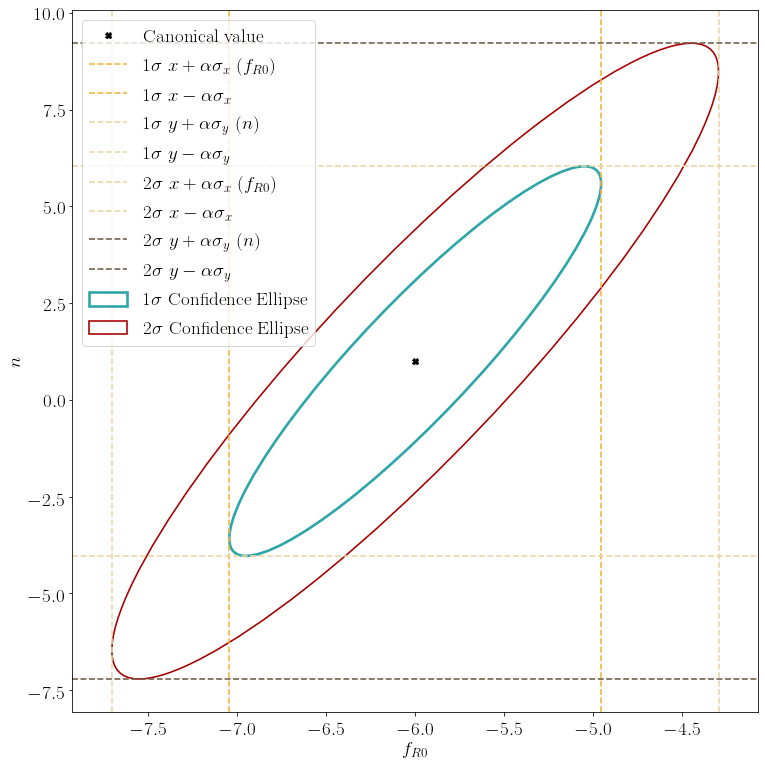

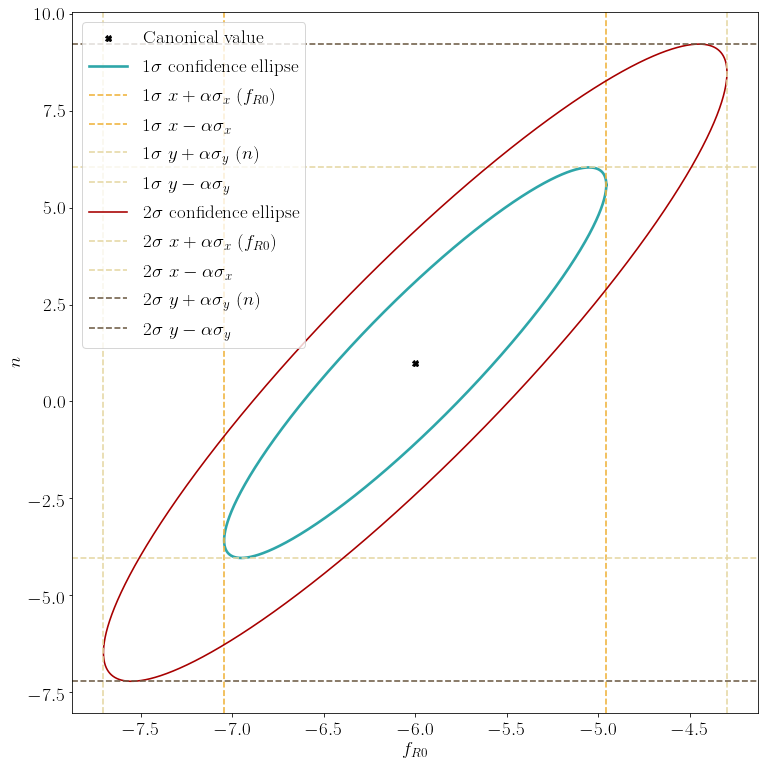

In [17]:
#f_{R0} = -6, normalized at z = 10. Five-point stencil added.
var = (z, k)
labels = r'$f_{R0} = 10^{-6}, n=1$'
pars = [-6, 1]
HS.set_axeslabels([r'$f_{R0}$', r'$n$'])
HS.set_printables(['log10(f_R0)', 'n'])
Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels)
import os
os.system('afplay /System/Library/Sounds/Submarine.aiff')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


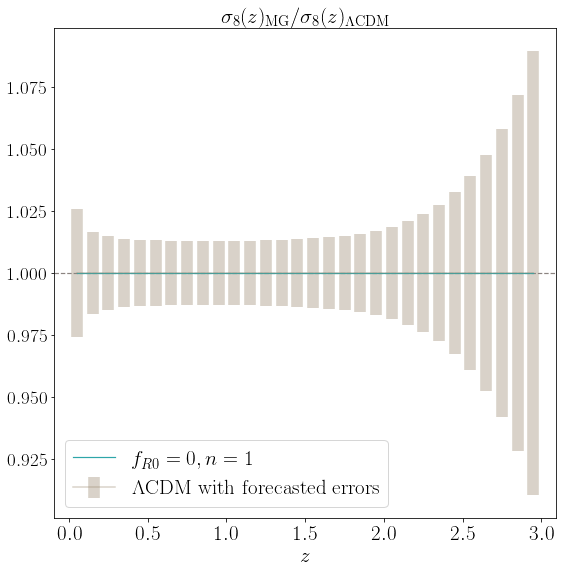

The fiducial is now 0, we can only test partial derivative over f_R0 itself
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over log10(f_R0) converges nicely, proceeding to partial 

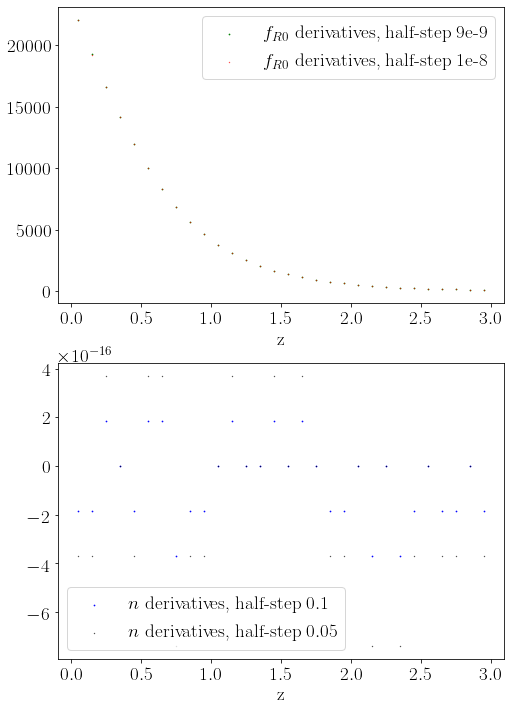

Partial derivatives over n is all-zero, now doing a singular Fisher analysis about f_R0
[-3.70074342e-16 -3.70074342e-16  3.70074342e-16  0.00000000e+00
 -3.70074342e-16  3.70074342e-16  3.70074342e-16 -7.40148683e-16
 -3.70074342e-16 -3.70074342e-16  0.00000000e+00  3.70074342e-16
  0.00000000e+00  0.00000000e+00  3.70074342e-16  0.00000000e+00
  3.70074342e-16  0.00000000e+00 -3.70074342e-16 -3.70074342e-16
  0.00000000e+00 -7.40148683e-16  0.00000000e+00 -7.40148683e-16
 -3.70074342e-16  0.00000000e+00 -3.70074342e-16 -3.70074342e-16
  0.00000000e+00 -3.70074342e-16]
The other derivative array:
[22025.64669247 19246.97361684 16608.36893584 14168.79115255
 11966.06548447 10018.08947618  8326.07964041  6878.75677598
  5656.57839822  4635.44449554  3789.6053105   3093.72597641
  2524.19969436  2059.86282988  1682.27578398  1375.71521372
  1126.99308093   925.18656718   761.33552425   628.14271145
   519.69663189   431.22631652   358.89084821   299.60254941
   250.8807755    210.7324108

0

In [18]:
#f_{R0} = 0, normalized at z = 10. Five-point stencil added. (Stepsize 1e-8, not rerunnable)
var = (z, k)
labels = r'$f_{R0} = 0, n=1$'
pars = [0, 1]
HS.set_axeslabels([r'$f_{R0}$', r'$n$'])
HS.set_printables(['f_R0', 'n'])
Fisher_MG_final.modelanalysis(HS, var, pars = pars, labels = labels)
import os
os.system('afplay /System/Library/Sounds/Submarine.aiff')

#### 7. Doing the Fisher analysis of $nDGP$ model with $r_c=2, 3, 4$ respectively

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


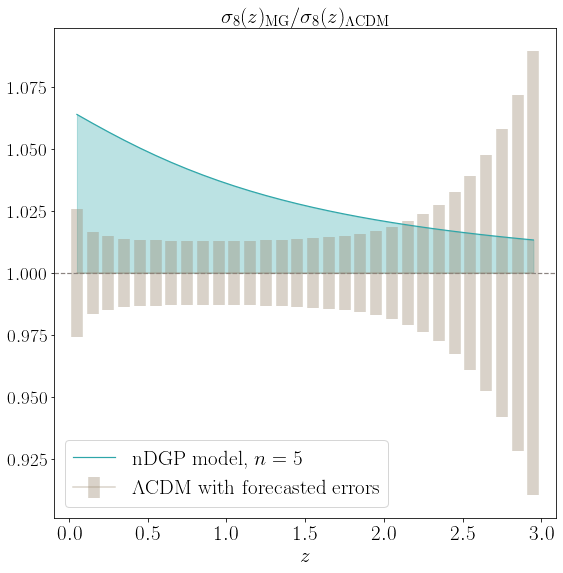

Testing partial derivative over n
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over n converges nicely
The chosen derivative array is:
[[-0.05098609]
 [-0.04846405]
 [-0.04600434

0

In [19]:
#n = 1
var = (z, k)
pars = 1
labels = r'nDGP model, $n=5$'
Fishn5, Errn5 = Fisher_MG_final.modelanalysis(DGP, var, pars = pars, labels = labels)
os.system('afplay /System/Library/Sounds/Submarine.aiff')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


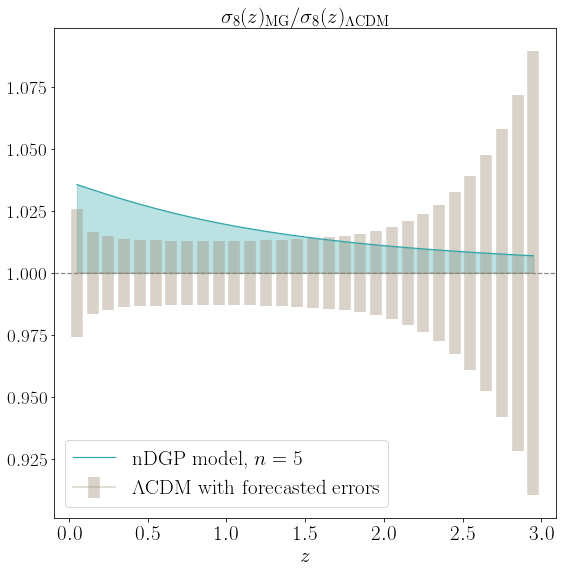

Testing partial derivative over n
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over n converges nicely
The chosen derivative array is:
[[-0.01569967]
 [-0.01483435]
 [-0.01399526

0

In [20]:
#n = 2
var = (z, k)
pars = 2
labels = r'nDGP model, $n=5$'
Fishn5, Errn5 = Fisher_MG_final.modelanalysis(DGP, var, pars = pars, labels = labels)
os.system('afplay /System/Library/Sounds/Submarine.aiff')

Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


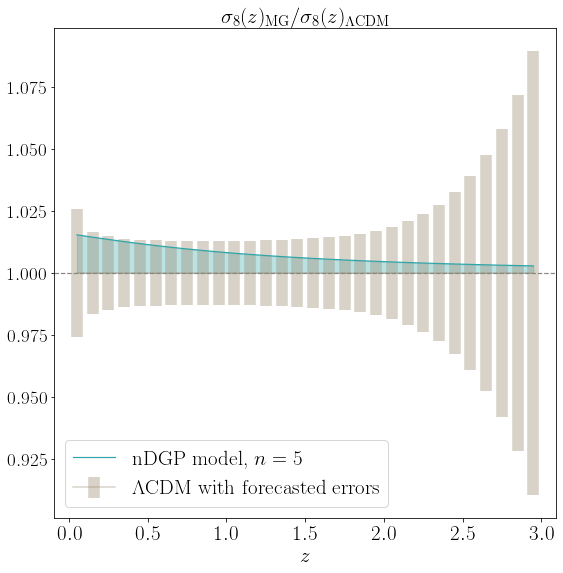

Testing partial derivative over n
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
Partial derivative over n converges nicely
The chosen derivative array is:
[[-0.00291144]
 [-0.00273785]
 [-0.00257032

0

In [21]:
#n = 5
var = (z, k)
pars = 5
labels = r'nDGP model, $n=5$'
Fishn5, Errn5 = Fisher_MG_final.modelanalysis(DGP, var, pars = pars, labels = labels)
os.system('afplay /System/Library/Sounds/Submarine.aiff')

#### 8. We also look at the $\Lambda\text{CDM}$ model, but there's no Fisher analysis to be done

No free parameters to set in LCDM model
Note: redshifts have been re-sorted (earliest first)
Note: redshifts have been re-sorted (earliest first)
The sigma8/sigma8_LCDM ratio plot of the model is:
The input redshift is:
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95]


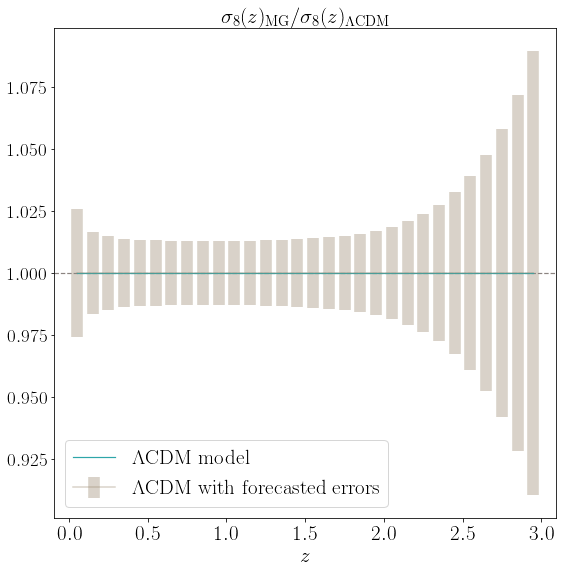

Currently no Fisher analysis to be done for this model


In [22]:
var = (z, k)
labels = r'$\Lambda$CDM model'
Fisher_MG_final.modelanalysis(LCDM, var, labels)